Dans n'importe quelle situation réelle de la science des données avec Python, vous aurez besoin de fusionner ou joindre des Dataframes ensemble pour former votre ensemble de données d'analyse. 

Fusionner et joindre des dataframes est un processus de base que tout analyste de données en herbe devra maîtriser. Ce notebook  traite du processus de fusion des ensembles de données, c'est-à-dire, joindre deux ensembles de données ensemble sur la base de colonnes communes entre eux. 

## Types de fusion

Il y a quatre différents types de fusions disponibles dans Pandas. Ces types de fusion sont communs à la plupart des bases de données et des langages orientés données (SQL, R, SAS) et sont généralement appelés " joints ". Si vous ne les connaissez pas, apprenez-les maintenant.

    Inner Merge / Inner join - Le comportement par défaut de Pandas, ne conserve que les lignes où la valeur de fusion "on" existe dans les dataframes de gauche et de droite.
    
    Left Merge / Left outer jointure - (aka left merge ou left jointure) Conserver= chaque ligne dans le dataframe de gauche. Lorsqu'il manque des valeurs de la variable "on" dans le cadre de données de droite, ajouter des valeurs vides / NaN dans le résultat.
    
    Right Merge / Right outer jointure - (aka right merge ou right jointure) Conserve chaque ligne dans le dataframe de droite. Lorsqu'il manque des valeurs de la variable "on" dans la colonne de gauche, ajouter les valeurs vides / NaN dans le résultat.
    
    Outer merge / jointure externe complète - Une jointure externe complète renvoie toutes les lignes du dataframe de gauche, toutes les lignes du dataframe de droite, et correspond aux lignes lorsque cela est possible, avec les NaNs ailleurs.

Le type de fusion à utiliser est spécifié à l'aide du paramètre "how" dans la commande de fusion, en prenant les valeurs "left", "right", "inner" (par défaut), ou "outer".

Les diagrammes de Venn sont couramment utilisés pour illustrer les différents types de fusion et de jonction. Voir cet exemple tiré de 

![Jointure](https://www.codeproject.com/KB/database/Visual_SQL_Joins/Visual_SQL_JOINS_orig.jpg)

## Comprendre la fusion

Commençons par une ligne de code de base qui fusionne deux trames de données en une seule. Avec cette commande, nous collectons toutes les lignes de données des deux dataframes et nous les alignons en fonction des valeurs de "some_column" qui sont communes aux deux dataframes.

**pd.merge(dataframe_gauche, dataframe_droite, on="colonne", how="left|right|inner|outer).**

    Le dataframe GAUCHE est celui que vous tapez en premier.
     Le dataframe  DROITE est celui que vous tapez en seconde.
    "on" est la colonne ou la liste des colonnes qui déterminent quelles lignes d'un tableau correspondent aux lignes du deuxième tableau. Parfois, les colonnes sur lesquelles vous voulez fusionner ont des noms différents dans les dataframes. Par exemple, un dataframe l'appelle IDENR alors que l'autre cadre de données l'appelle IDLIGNE même s'il s'agit en réalité du même ID. Dans ces cas, vous pouvez spécifier les noms de colonnes séparément pour chaque dataframe en utilisant les arguments "left_on" et "right_on".
    "how" est la méthode à utiliser, par défaut Pandas utilise la méthode "inner".



Parlons des quatre méthodes de fusion : Left, Right, Inner, Outer

Nous avons quatre méthodes parce que lorsque vous fusionnez des dataframe, vous n'aurez pas toujours une correspondance un à un entre les lignes. Ces quatre méthodes affectent la façon dont Pandas traite les données non appariées et c'est ce que nous allons découvrir.

Voici quelques dataframes que nous allons utilisé.

In [4]:
import pandas as pd
import numpy as np

gauche  = {'ID': [1, 2, 3, 4],
           'DF_Gauche': ['GAUCHE', 'GAUCHE', 'GAUCHE', 'GAUCHE']
        }

df_gauche = pd.DataFrame(gauche )

droite  = {'ID': [3, 4, 5, 6],
           'DF_Droite': ['DROITE', 'DROITE', 'DROITE', 'DROITE']
          }

df_droite = pd.DataFrame(droite )


In [7]:
df_gauche

,ID,DF_Gauche
0,1,GAUCHE
1,2,GAUCHE
2,3,GAUCHE
3,4,GAUCHE


In [8]:
df_droite

,ID,DF_Droite
0,3,DROITE
1,4,DROITE
2,5,DROITE
3,6,DROITE


# 1. Fusion à gauche (LEFT MERGE)

Dans une fusion à gauche, nous nous occupons surtout des données du côté GAUCHE, mais nous aimerions ajouter les données du côté DROIT s'il y a des ID identiques.

Pour ce faire, nous coupons les lignes du dataframe DROIT et en collons des morceaux sur le cadre de données GAUCHE. Rappelez-vous, nous nous soucions surtout du côté GAUCHE et ne voulons des données du côté DROIT que si elles ont les mêmes identifiants. 

Donc si quelque chose dans le cadre de données DROIT ne correspond pas ou n'existe pas, alors nous devons faire des choses pour garder les colonnes de la même longueur. Nous le faisons soit en ajoutant du NaN pour combler le vide, soit en rejetant entièrement certaines rangées.

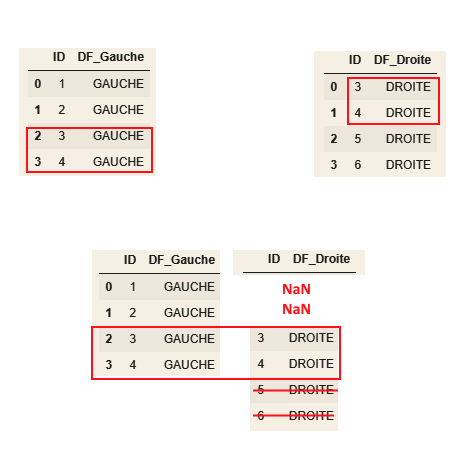

Dans cet exemple, le côté GAUCHE a les ID 1, 2, 3 et 4 :

    Le côté DROIT n'a pas d'ID 1 ou 2 donc nous ajoutons des NaN's parce que nous avons besoin de colonnes de la même longueur.
    Le côté DROIT a des données pour les ID 3 et 4 donc nous l'ajoutons comme une nouvelle colonne.
    Le côté GAUCHE n'a pas d'ID 5 ou 6, donc nous n'avons pas besoin de cette information de la DROITE et elle est rejetée.


In [6]:
pd.merge(left=df_gauche, right=df_droite, on="ID", how="left")

,ID,DF_Gauche,DF_Droite
0,1,GAUCHE,NaN
1,2,GAUCHE,NaN
2,3,GAUCHE,DROITE
3,4,GAUCHE,DROITE


# 2. Fusion à droite (Right Merge)

Les fusions à droite fonctionnent comme les fusions à gauche, la différence est que nous nous soucions surtout du côté DROIT et aimerions ajouter des données de la GAUCHE s'il y a des ID correspondants.

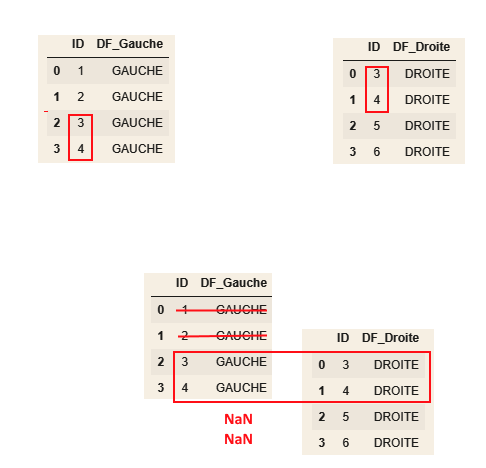

In [9]:
pd.merge(left=df_gauche, right=df_droite, on="ID", how="right")

,ID,DF_Gauche,DF_Droite
0,3,GAUCHE,DROITE
1,4,GAUCHE,DROITE
2,5,NaN,DROITE
3,6,NaN,DROITE


# 3. Fusion interne (Inner merge)

Avec un Inner Merge, nous coupons les deux dataframes et ne collons que ce qui correspond. Si un ID n'est pas dans les deux dataframes, nous ne le gardons pas et nous n'ajoutons pas de NaN's.

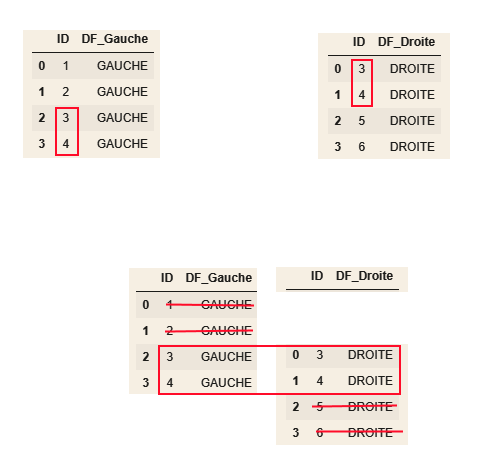

In [10]:
pd.merge(left=df_gauche, right=df_droite, on="ID", how="inner")

,ID,DF_Gauche,DF_Droite
0,3,GAUCHE,DROITE
1,4,GAUCHE,DROITE


# 4. Fusion externe (outer merge)

Avec un Outer Merge, nous coupons les deux dataframes et gardons tout les deux côtés. Ensuite, nous ajoutons des NaN pour remplir les blancs.

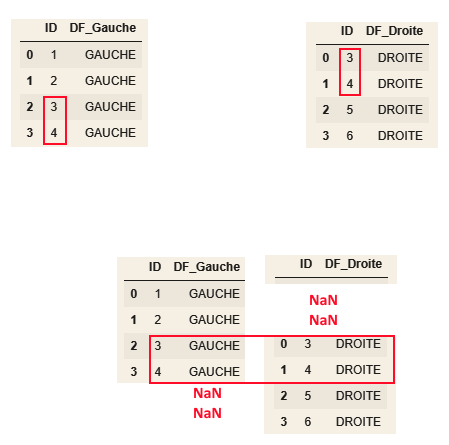

In [11]:
pd.merge(left=df_gauche, right=df_droite, on="ID", how="outer")

,ID,DF_Gauche,DF_Droite
0,1,GAUCHE,NaN
1,2,GAUCHE,NaN
2,3,GAUCHE,DROITE
3,4,GAUCHE,DROITE
4,5,NaN,DROITE
5,6,NaN,DROITE


## Que se passe t il si il y a des doublons ?

In [5]:
gauche  = {'ID': [1, 2, 3, 4,1,1],
           'DF_Gauche': ['GAUCHE 1', 'GAUCHE', 'GAUCHE', 'GAUCHE', 'GAUCHE 2', 'GAUCHE 3']
        }

df_gauche = pd.DataFrame(gauche )

droite  = {'ID': [3, 4, 5, 6, 1, 1],
           'DF_Droite': ['DROITE', 'DROITE', 'DROITE', 'DROITE', 'DROITE 1', 'DROITE 2']
          }

df_droite = pd.DataFrame(droite )

pd.merge(left=df_gauche, right=df_droite, on="ID", how="left")

,ID,DF_Gauche,DF_Droite
0,1,GAUCHE 1,DROITE 1
1,1,GAUCHE 1,DROITE 2
2,2,GAUCHE,NaN
3,3,GAUCHE,DROITE
4,4,GAUCHE,DROITE
5,1,GAUCHE 2,DROITE 1
6,1,GAUCHE 2,DROITE 2
7,1,GAUCHE 3,DROITE 1
8,1,GAUCHE 3,DROITE 2


In [7]:

print(df_droite)
print("   ")
print(df_gauche)

pd.merge(left=df_gauche, right=df_droite, on="ID", how="right")

   ID DF_Droite
0   3    DROITE
1   4    DROITE
2   5    DROITE
3   6    DROITE
4   1  DROITE 1
5   1  DROITE 2
   
   ID DF_Gauche
0   1  GAUCHE 1
1   2    GAUCHE
2   3    GAUCHE
3   4    GAUCHE
4   1  GAUCHE 2
5   1  GAUCHE 3


,ID,DF_Gauche,DF_Droite
0,1,GAUCHE 1,DROITE 1
1,1,GAUCHE 2,DROITE 1
2,1,GAUCHE 3,DROITE 1
3,1,GAUCHE 1,DROITE 2
4,1,GAUCHE 2,DROITE 2
5,1,GAUCHE 3,DROITE 2
6,3,GAUCHE,DROITE
7,4,GAUCHE,DROITE
8,5,NaN,DROITE
9,6,NaN,DROITE


In [21]:
print(df_droite)
print("   ")
print(df_gauche)

pd.merge(left=df_gauche, right=df_droite, on="ID", how="inner")

,ID,DF_Gauche,DF_Droite
0,1,GAUCHE 1,DROITE 1
1,1,GAUCHE 1,DROITE 2
2,1,GAUCHE 2,DROITE 1
3,1,GAUCHE 2,DROITE 2
4,1,GAUCHE 3,DROITE 1
5,1,GAUCHE 3,DROITE 2
6,3,GAUCHE,DROITE
7,4,GAUCHE,DROITE


In [9]:
print(df_droite)
print("   ")
print(df_gauche)

pd.merge(left=df_gauche, right=df_droite, on="ID", how="outer")

   ID DF_Droite
0   3    DROITE
1   4    DROITE
2   5    DROITE
3   6    DROITE
4   1  DROITE 1
5   1  DROITE 2
   
   ID DF_Gauche
0   1  GAUCHE 1
1   2    GAUCHE
2   3    GAUCHE
3   4    GAUCHE
4   1  GAUCHE 2
5   1  GAUCHE 3


,ID,DF_Gauche,DF_Droite
0,1,GAUCHE 1,DROITE 1
1,1,GAUCHE 1,DROITE 2
2,1,GAUCHE 2,DROITE 1
3,1,GAUCHE 2,DROITE 2
4,1,GAUCHE 3,DROITE 1
5,1,GAUCHE 3,DROITE 2
6,2,GAUCHE,NaN
7,3,GAUCHE,DROITE
8,4,GAUCHE,DROITE
9,5,NaN,DROITE
